Covariance Matrix:
[[1.01010101 0.67589685 0.41006669]
 [0.67589685 1.01010101 0.08990523]
 [0.41006669 0.08990523 1.01010101]]
Eigenvalues:
[0.257185   0.93058501 1.84253303]
Eigenvectors:
[[-0.72348439 -0.05353698 -0.68826167]
 [ 0.61113817 -0.51334632 -0.60248294]
 [ 0.32106148  0.85650998 -0.40411654]]


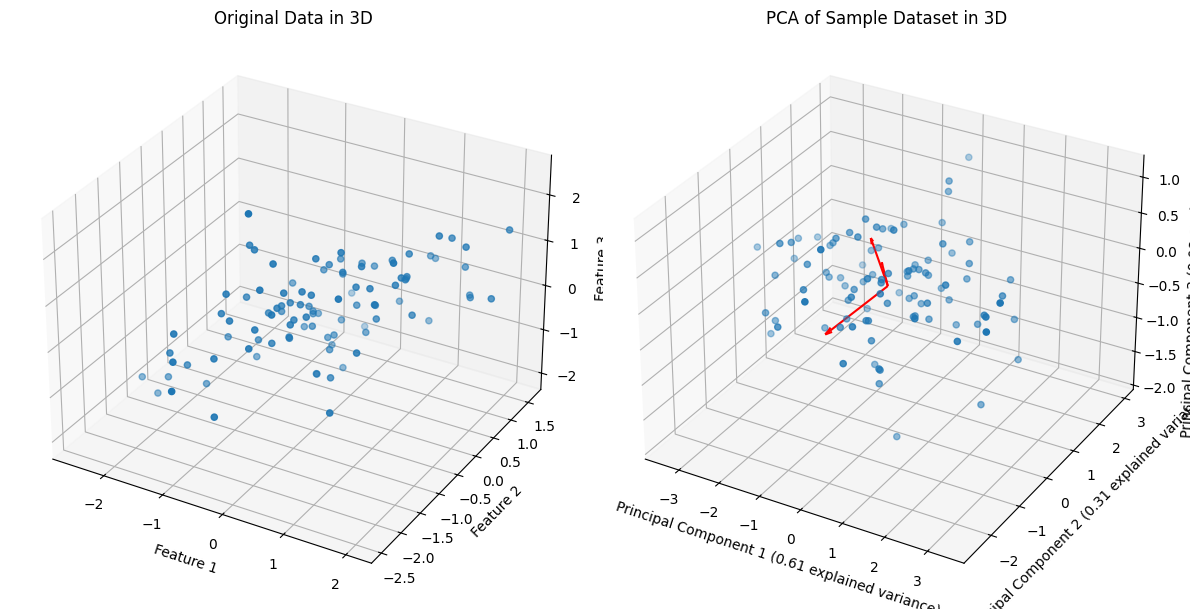

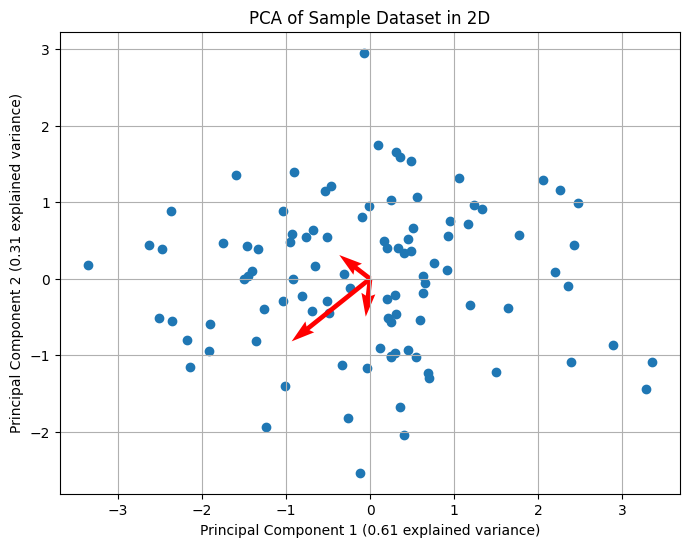

Proportion of explained variance: [0.6080359  0.30709305 0.08487105]


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

# Create a sample dataset in 3 dimensions
np.random.seed(42)
mean = [0, 0, 0]
cov = [[1, 0.8, 0.5], [0.8, 1, 0.3], [0.5, 0.3, 1]]  # covariance matrix
data = np.random.multivariate_normal(mean, cov, 100)
df = pd.DataFrame(data, columns=['Feature_1', 'Feature_2', 'Feature_3'])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Calculate the covariance matrix manually
cov_matrix = np.cov(scaled_data, rowvar=False)
print("Covariance Matrix:")
print(cov_matrix)

# Perform eigenvalue and eigenvector decomposition
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
print("Eigenvalues:")
print(eigenvalues)
print("Eigenvectors:")
print(eigenvectors)

# Sort the eigenvalues and eigenvectors in descending order
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Transform the data to the principal components
pca_result = np.dot(scaled_data, eigenvectors)
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3'])

# Plot the original data in 3D
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(df['Feature_1'], df['Feature_2'], df['Feature_3'])
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('Original Data in 3D')

# Plot the principal components in 3D
ax = fig.add_subplot(122, projection='3d')
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'])
for i in range(len(eigenvectors)):
    vector = eigenvectors[:, i] * np.sqrt(eigenvalues[i])
    ax.quiver(0, 0, 0, vector[0], vector[1], vector[2], color='r', arrow_length_ratio=0.1)
ax.set_xlabel(f'Principal Component 1 ({eigenvalues[0]/np.sum(eigenvalues):.2f} explained variance)')
ax.set_ylabel(f'Principal Component 2 ({eigenvalues[1]/np.sum(eigenvalues):.2f} explained variance)')
ax.set_zlabel(f'Principal Component 3 ({eigenvalues[2]/np.sum(eigenvalues):.2f} explained variance)')
ax.set_title('PCA of Sample Dataset in 3D')
plt.tight_layout()
plt.show()

# Plot the PCA result in 2D
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'])
for i in range(len(eigenvectors)):
    plt.quiver(0, 0, eigenvectors[0, i] * np.sqrt(eigenvalues[i]), eigenvectors[1, i] * np.sqrt(eigenvalues[i]), 
               angles='xy', scale_units='xy', scale=1, color='r')
plt.xlabel(f'Principal Component 1 ({eigenvalues[0]/np.sum(eigenvalues):.2f} explained variance)')
plt.ylabel(f'Principal Component 2 ({eigenvalues[1]/np.sum(eigenvalues):.2f} explained variance)')
plt.title('PCA of Sample Dataset in 2D')
plt.grid(True)
plt.show()

# Show the explained variance
explained_variance = eigenvalues / np.sum(eigenvalues)
print('Proportion of explained variance:', explained_variance)

Autovalores de la matriz de covarianzas real:
[1.8 0.2]
Autovalores de la matriz de covarianzas muestral:
[1.75507122 0.2651308 ]


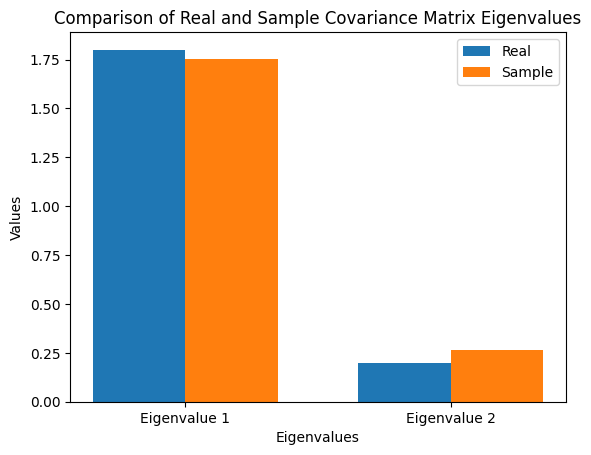

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Fijar la semilla para reproducibilidad
np.random.seed(42)

# Definir la media y la matriz de covarianzas reales
mean = [0, 0]
real_cov = [[1, 0.8], [0.8, 1]]  # matriz de covarianzas real

# Generar el conjunto de datos de muestra
data = np.random.multivariate_normal(mean, real_cov, 100)
df = pd.DataFrame(data, columns=['Feature_1', 'Feature_2'])

# Estandarizar los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Calcular la matriz de covarianzas muestral
sample_cov_matrix = np.cov(scaled_data, rowvar=False)

# Calcular autovalores y autovectores de la matriz de covarianzas real
real_eigenvalues, real_eigenvectors = np.linalg.eigh(real_cov)

# Calcular autovalores y autovectores de la matriz de covarianzas muestral
sample_eigenvalues, sample_eigenvectors = np.linalg.eigh(sample_cov_matrix)

# Ordenar los autovalores de mayor a menor
real_eigenvalues = np.flip(real_eigenvalues)
sample_eigenvalues = np.flip(sample_eigenvalues)

# Imprimir los autovalores
print("Autovalores de la matriz de covarianzas real:")
print(real_eigenvalues)
print("Autovalores de la matriz de covarianzas muestral:")
print(sample_eigenvalues)

# Visualizar la comparación
labels = ['Eigenvalue 1', 'Eigenvalue 2']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, real_eigenvalues, width, label='Real')
rects2 = ax.bar(x + width/2, sample_eigenvalues, width, label='Sample')

ax.set_xlabel('Eigenvalues')
ax.set_ylabel('Values')
ax.set_title('Comparison of Real and Sample Covariance Matrix Eigenvalues')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

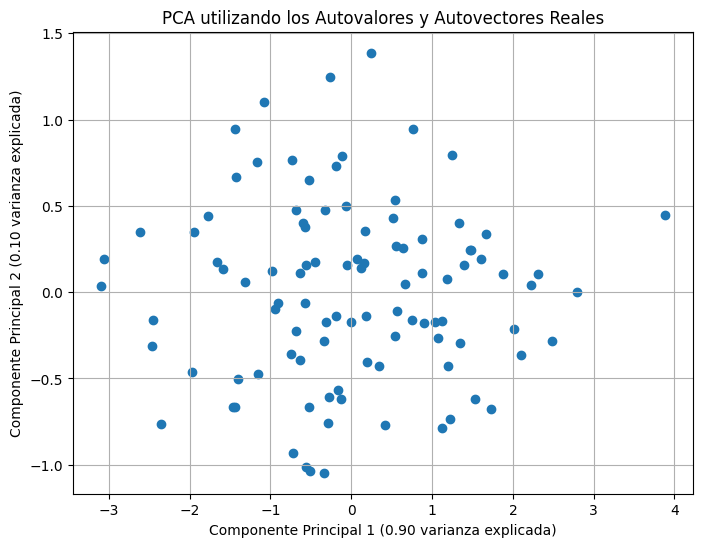

Proporción de varianza explicada utilizando los autovalores y autovectores reales: [0.9 0.1]


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Fijar la semilla para reproducibilidad
np.random.seed(42)

# Definir la media y la matriz de covarianzas reales
mean = [0, 0]
real_cov = [[1, 0.8], [0.8, 1]]  # matriz de covarianzas real

# Generar el conjunto de datos de muestra
data = np.random.multivariate_normal(mean, real_cov, 100)
df = pd.DataFrame(data, columns=['Feature_1', 'Feature_2'])

# Estandarizar los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Calcular la matriz de covarianzas muestral
sample_cov_matrix = np.cov(scaled_data, rowvar=False)

# Calcular autovalores y autovectores de la matriz de covarianzas real
real_eigenvalues, real_eigenvectors = np.linalg.eigh(real_cov)

# Ordenar los autovalores y autovectores de mayor a menor
idx = np.argsort(real_eigenvalues)[::-1]
real_eigenvalues = real_eigenvalues[idx]
real_eigenvectors = real_eigenvectors[:, idx]

# Transformar los datos a los componentes principales utilizando los autovectores reales
pca_result_real = np.dot(scaled_data, real_eigenvectors)
pca_df_real = pd.DataFrame(pca_result_real, columns=['PC1', 'PC2'])

# Graficar los resultados
plt.figure(figsize=(8, 6))
plt.scatter(pca_df_real['PC1'], pca_df_real['PC2'])
plt.xlabel(f'Componente Principal 1 ({real_eigenvalues[0]/np.sum(real_eigenvalues):.2f} varianza explicada)')
plt.ylabel(f'Componente Principal 2 ({real_eigenvalues[1]/np.sum(real_eigenvalues):.2f} varianza explicada)')
plt.title('PCA utilizando los Autovalores y Autovectores Reales')
plt.grid(True)
plt.show()

# Mostrar la varianza explicada
explained_variance_real = real_eigenvalues / np.sum(real_eigenvalues)

print('Proporción de varianza explicada utilizando los autovalores y autovectores reales:', explained_variance_real)